<a href="https://colab.research.google.com/github/sense64/data_viz/blob/main/senior_digital_competency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ 데이터로 풀어가는 고령사회 과제 및 기회(고령자 디지털 역량)
▪ 작성일 : 2023년 10월 8일

▪ 사용데이터 : 디지털정보격차 실태조사, 2021년(마이크로 데이터)

▪ 실습내용

이 실습은 고령자정보역량을 input데이터로 사용하여 고령자의 디지털 정보 역량을  군집화하는 내용입니다. 각 군집별 격차해소를 위한 방안을 도출하기 위한 내용입니다.

  1. Planning
  2. Data Preparing
  3. Data Analying
     - 계층적 군집
     - 중심기반 군집
  4. Visualization
  5. 방안제시


# ① Planning

프로젝트 목표
  - 고령자 디지털 역략 파악
  - 고령자 디지털 역량 격차 해소를 위한 방안

#한글이 깨어져 나오는 경우
아래의 코드를 실행시키고, [런타임]메뉴->런타임 다시 시작
코드는 반드시 상위에 위치함

In [16]:
#한글이 깨어지는 경우

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and direc

# ② Data Import & 데이터 전처리




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#나눔맑음고딕 한글 폰트를 설치
plt.rc('font', family='NanumBarunGothic')

# 고령자 디지털 역량 데이터
https://github.com/sense64/data_viz/tree/main/data
에서 sinor.xlsx 파일을 다운로드함


In [2]:
df =pd.read_excel('/content/drive/MyDrive/lab/sinor_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      1808 non-null   int64  
 1   Q5A1    1808 non-null   int64  
 2   Q5A2    1808 non-null   int64  
 3   Q5A3    1808 non-null   int64  
 4   Q5A4    1808 non-null   int64  
 5   Q5A5    1808 non-null   int64  
 6   Q5A6    1808 non-null   int64  
 7   Q5A7    1808 non-null   int64  
 8   Q5      1808 non-null   float64
 9   Q8B1    1808 non-null   int64  
 10  Q8B2    1808 non-null   int64  
 11  Q8B3    1808 non-null   int64  
 12  Q8B4    1808 non-null   int64  
 13  Q8      1808 non-null   float64
 14  Q9B1    1808 non-null   int64  
 15  Q9B2    1808 non-null   int64  
 16  Q9B3    1808 non-null   int64  
 17  Q9B4    1808 non-null   int64  
 18  Q9B5    1808 non-null   int64  
 19  Q9      1808 non-null   float64
 20  Q10B1   1808 non-null   int64  
 21  Q10B2   1808 non-null   int64  
 22  

In [41]:
#범주형데이터와 계량형 데이터를 구분함
df_num=df[['Q5', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']]
df_cat=df[['age', 'gender', 'wage']]
data=df[['Q5', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'age', 'gender', 'wage']]

            Q5    Q8   Q9   Q10  Q11  Q12   Q13   Q14  age  gender  wage
0     2.571429  2.25  1.6  1.75  2.0  2.5  1.00  1.25    2       1     6
1     1.714286  2.25  1.6  2.50  1.0  2.0  1.00  1.50    1       2     3
2     2.285714  2.25  1.6  2.50  2.5  3.0  3.00  3.00    1       2     4
3     1.571429  2.75  3.0  3.00  3.5  3.5  2.25  2.25    2       2     4
4     2.428571  1.75  1.4  2.50  1.0  2.5  1.50  1.00    2       1     3
...        ...   ...  ...   ...  ...  ...   ...   ...  ...     ...   ...
1803  4.000000  3.00  3.4  3.00  4.0  3.0  3.50  3.50    1       1     5
1804  4.000000  2.50  2.6  3.25  3.0  3.5  3.00  3.50    1       1     4
1805  4.000000  2.75  1.6  2.25  3.0  3.0  3.00  3.00    1       1     7
1806  4.000000  3.50  3.2  3.50  4.0  3.0  2.50  2.25    1       1     4
1807  4.000000  2.50  2.0  2.00  2.0  1.0  1.00  1.00    2       1     4

[1808 rows x 11 columns]


#데이터 탐색
계량형 데이터 : describe()

범주형 데이터 : value.counts()


In [ ]:
#데이터 탐색
print(df_num.describe())

                Q5          Q8           Q9          Q10          Q11  \
count  1808.000000  1808.00000  1808.000000  1808.000000  1808.000000   
mean      2.509798     2.14021     1.918916     2.198977     1.887168   
std       0.759785     0.64728     0.628978     0.756947     0.850789   
min       1.000000     1.00000     1.000000     1.000000     1.000000   
25%       2.000000     1.75000     1.400000     1.500000     1.000000   
50%       2.571429     2.00000     1.800000     2.250000     2.000000   
75%       3.000000     2.50000     2.400000     2.750000     2.500000   
max       4.000000     4.00000     4.000000     4.000000     4.000000   

               Q12          Q13          Q14  
count  1808.000000  1808.000000  1808.000000  
mean      2.217091     1.591814     1.666897  
std       0.820848     0.765906     0.766743  
min       1.000000     1.000000     1.000000  
25%       1.500000     1.000000     1.000000  
50%       2.000000     1.000000     1.500000  
75%       3.0

In [ ]:
print("연령 : ", df_cat['age'].value_counts())
print("성별 : ", df_cat['gender'].value_counts() )
print("소득 : ", df_cat['wage'].value_counts() )

연령 :  2    849
1    496
3    463
Name: age, dtype: int64
성별 :  1    908
2    900
Name: gender, dtype: int64
소득 :  3     383
4     359
2     346
5     196
6     195
7     129
1     104
8      52
9      33
11     10
10      1
Name: wage, dtype: int64


In [7]:
#반복문을 이용하여 모든 범주형 데이터의 빈도분석을 한꺼번에 처리
for col in df_cat.columns :
  print(col)
  print(df[col].value_counts())
  print(df[col].value_counts(normalize=True)*100)
  print("=================================")

age
2    849
1    496
3    463
Name: age, dtype: int64
2    46.957965
1    27.433628
3    25.608407
Name: age, dtype: float64
gender
1    908
2    900
Name: gender, dtype: int64
1    50.221239
2    49.778761
Name: gender, dtype: float64
wage
3     383
4     359
2     346
5     196
6     195
7     129
1     104
8      52
9      33
11     10
10      1
Name: wage, dtype: int64
3     21.183628
4     19.856195
2     19.137168
5     10.840708
6     10.785398
7      7.134956
1      5.752212
8      2.876106
9      1.825221
11     0.553097
10     0.055310
Name: wage, dtype: float64


#데이터 크린징, 데이터 수정 그리고 코드를 라벨링함
- 결측치 확인 .isnull().sum() : 결측치가 있을 경우 행삭제 또는 평균 및 중앙값 대체 등 데이터 크린징
- 소득을 그룹핑을 다시함
- 연령, 소득, 성별을 코드를 한글로 변경(라벨링) 함

In [9]:
df.isnull().sum() #결측치 확인

no        0
Q5A1      0
Q5A2      0
Q5A3      0
Q5A4      0
Q5A5      0
Q5A6      0
Q5A7      0
Q5        0
Q8B1      0
Q8B2      0
Q8B3      0
Q8B4      0
Q8        0
Q9B1      0
Q9B2      0
Q9B3      0
Q9B4      0
Q9B5      0
Q9        0
Q10B1     0
Q10B2     0
Q10B3     0
Q10B4     0
Q10       0
Q11B1     0
Q11B2     0
Q11       0
Q12B1     0
Q12B2     0
Q12       0
Q13B1     0
Q13B2     0
Q13B3     0
Q13B4     0
Q13       0
Q14B1     0
Q14B2     0
Q14B3     0
Q14B4     0
Q14       0
age       0
gender    0
wage      0
wt_가중치    0
dtype: int64

In [31]:
#소득을 재분류함(고소득자를 재분류)
w=[]
for data in df['wage']:
  if data==1 or data==2 or data==3 or data==4 :
    w.append(data)
  elif data==5 or data==6 :
    w.append(5)
  else :
    w.append(6)

df['w'] =pd.DataFrame(w)
df_cat['w'] =pd.DataFrame(w)

In [32]:
#코드를 한글로 라벨링
df_cat= df_cat.replace({'gender' : 1}, "남자")
df_cat = df_cat.replace({'gender' : 2}, "여자")
df_cat = df_cat.replace({'age' : 1}, "50대")
df_cat = df_cat.replace({'age' : 2}, "60대")
df_cat = df_cat.replace({'age' : 3}, "70대이상")
df_cat = df_cat.replace({'w' : 1}, "100만원미만")
df_cat = df_cat.replace({'w' : 2}, "100만원대")
df_cat = df_cat.replace({'w' : 3}, "200만원대")
df_cat = df_cat.replace({'w' : 4}, "300만원대")
df_cat = df_cat.replace({'w' : 5}, "400-500만원대")
df_cat = df_cat.replace({'w' : 6}, "600만원이상")
df_cat.head(10)

,age,gender,wage,w
0,60대,남자,6,400-500만원대
1,50대,여자,3,200만원대
2,50대,여자,4,300만원대
3,60대,여자,4,300만원대
4,60대,남자,3,200만원대
5,70대이상,여자,6,400-500만원대
6,60대,여자,6,400-500만원대
7,70대이상,남자,3,200만원대
8,60대,여자,4,300만원대
9,70대이상,여자,2,100만원대


#사용할 데이터 셑
- 계량형 데이터 : df_num
- 범주형 데이터 : df_cat
- 데이터 전체 : data

In [33]:
#사용할 데이터셑
df_data = pd.concat([df_num, df_cat], axis=1, join='inner')
df_data.drop('wage', axis=1, inplace=True) #wage 삭제


# 연령과 소득별로 전체 디지털 역량 지표를 그림으로 확인

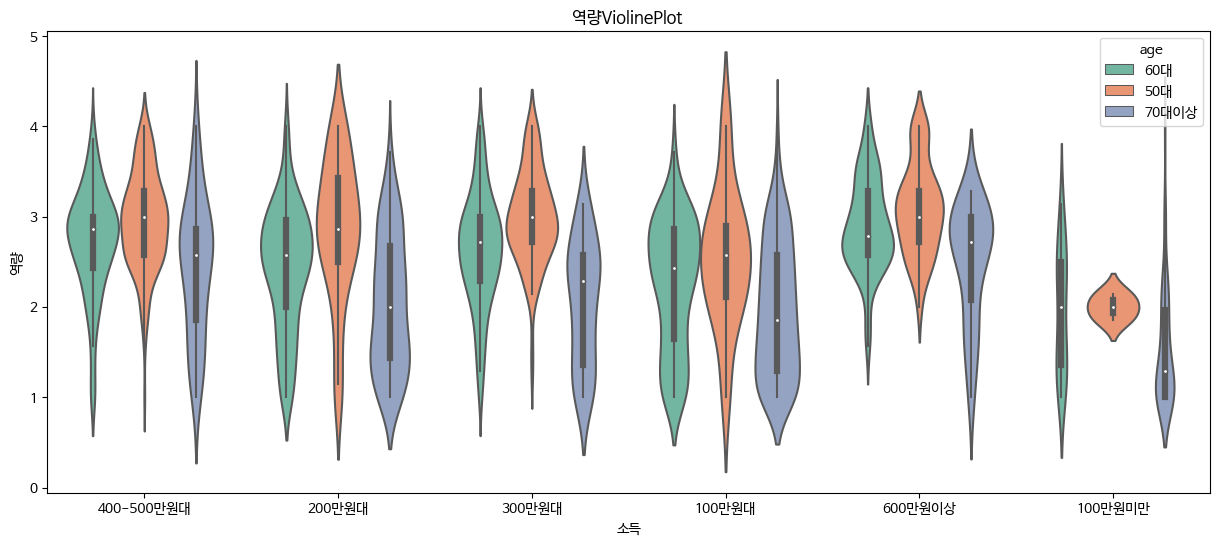

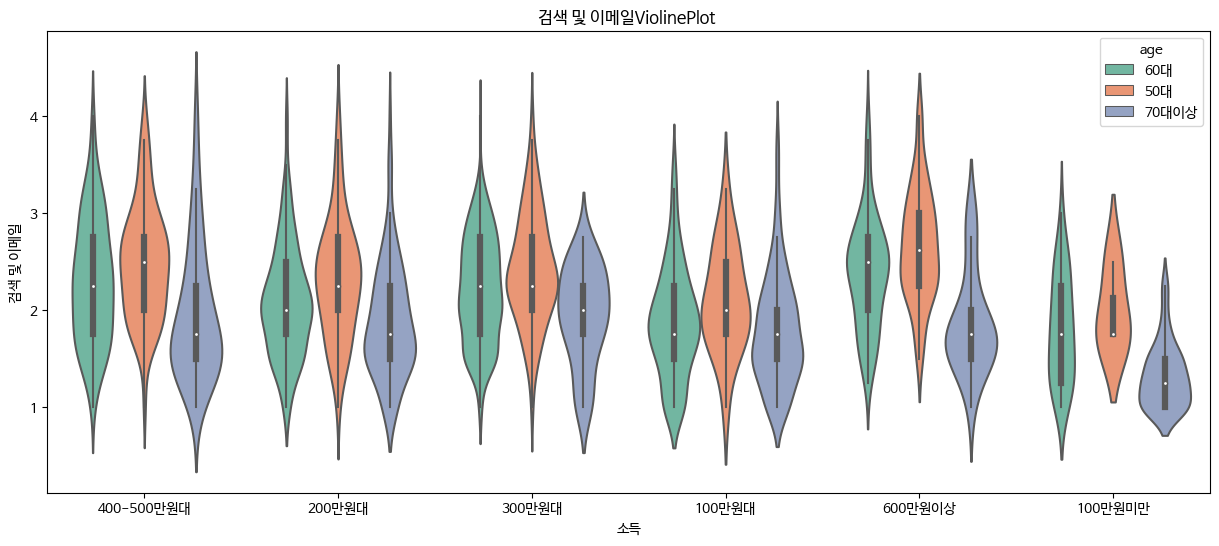

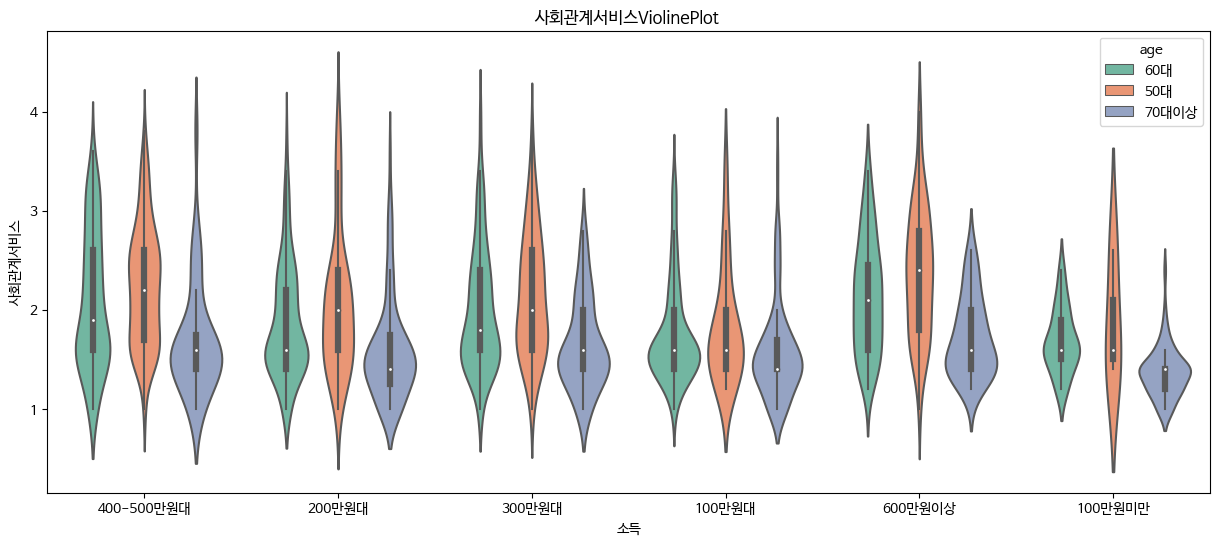

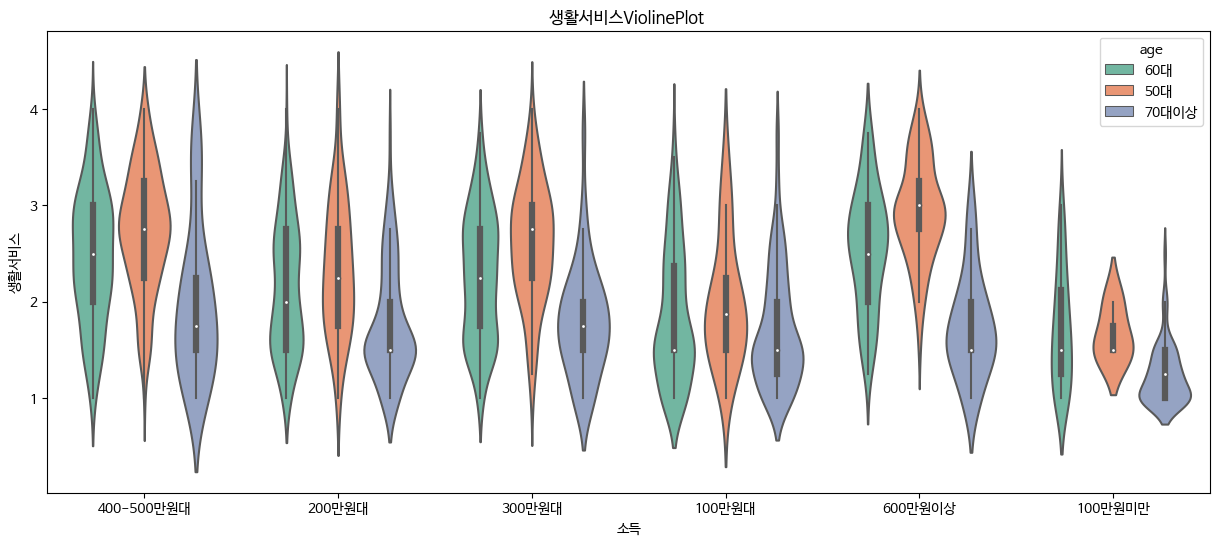

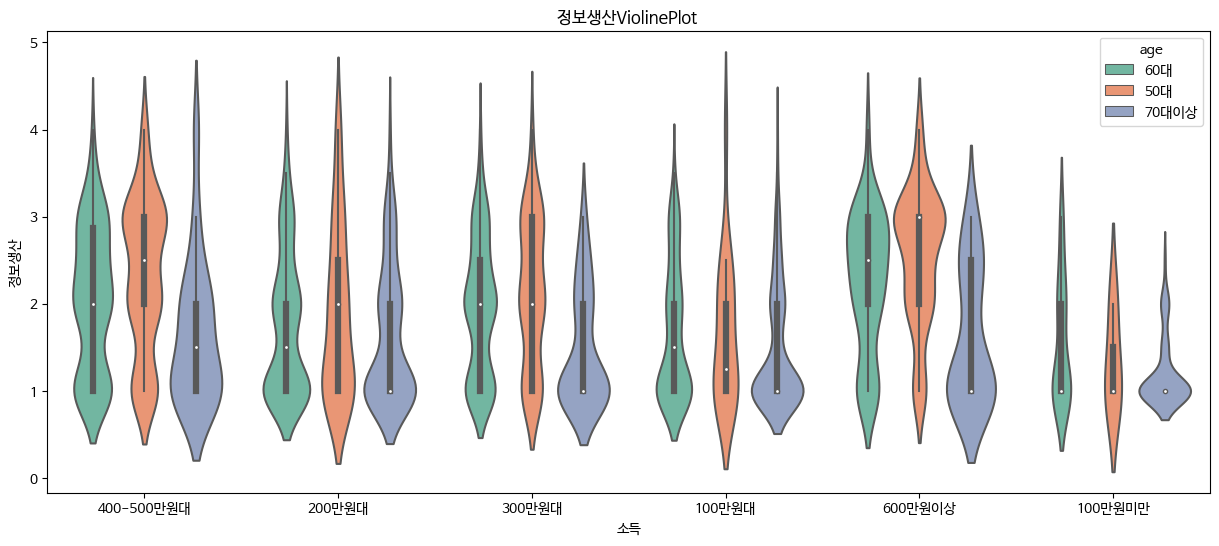

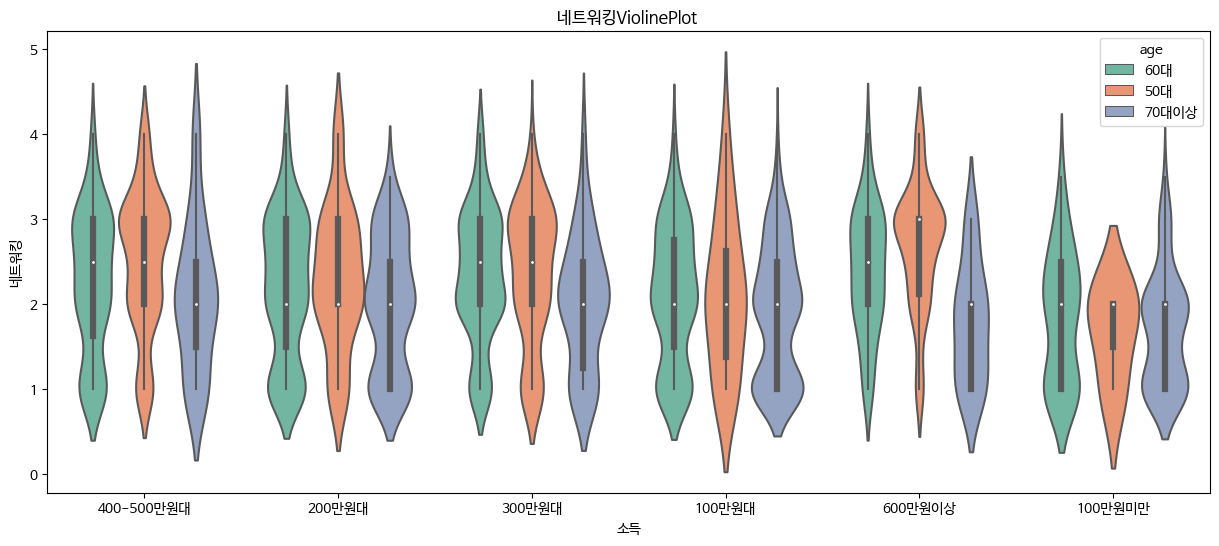

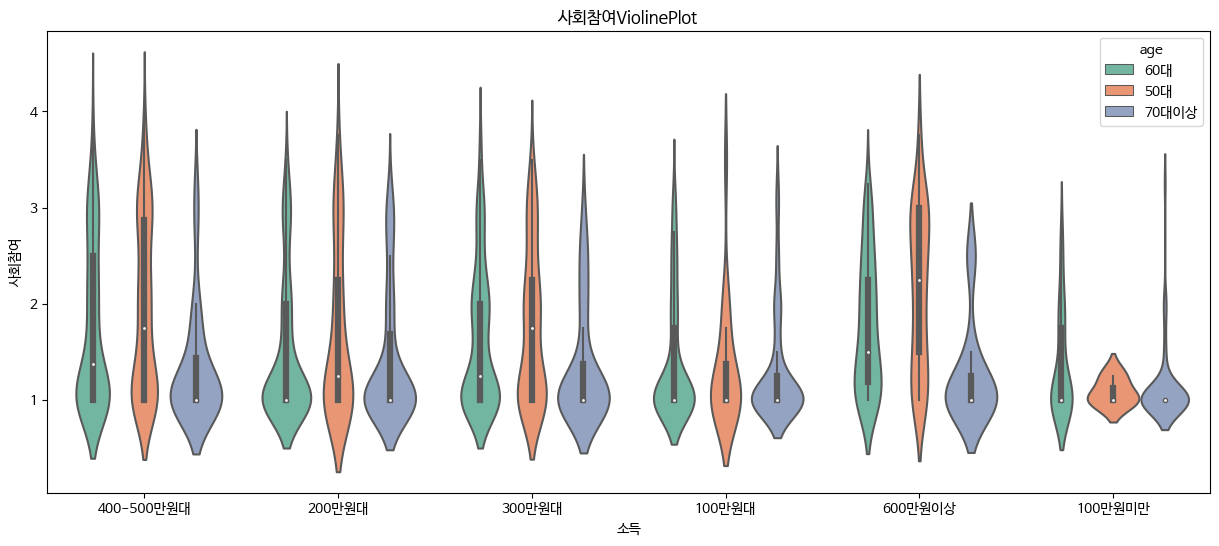

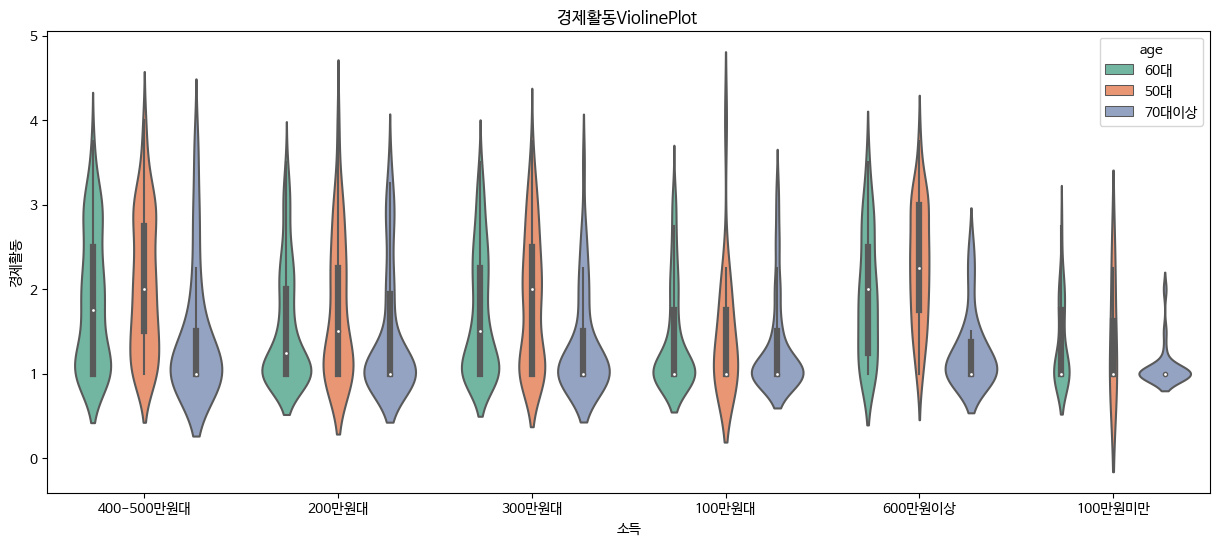

In [34]:
#연령과 소득별 디지털 역량지표 바이올린그래프로 확인
dic = {'역량': 'Q5', '검색 및 이메일' : 'Q8', '사회관계서비스': 'Q9', '생활서비스': 'Q10', '정보생산': 'Q11', '네트워킹':'Q12',  '사회참여': 'Q13', '경제활동': 'Q14'} #딕셔너리로 정의
for key, val in dic.items() : #한꺼번에 violinplot을 그리기 위해 for문사용
  plt.figure(figsize=(15, 6))
  sns.violinplot(x="w", y=val, hue="age", data=df_data, palette="Set2")
  plt.xlabel("소득")
  plt.ylabel(key)
  plt.title( key + 'ViolinePlot ')
  plt.show()

# ③ Data Analyzing

- 계층적 군집
  * 응집형, ward병합방법
- 중심기반 군집
  * 군집수 확인
  * K-Means

# 계층적 군집


In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram #병합모듈, 데드로그램 모듈을 가지고 옴
import matplotlib.pyplot as plt

m = linkage(data,method='complete') #병합방법 ward

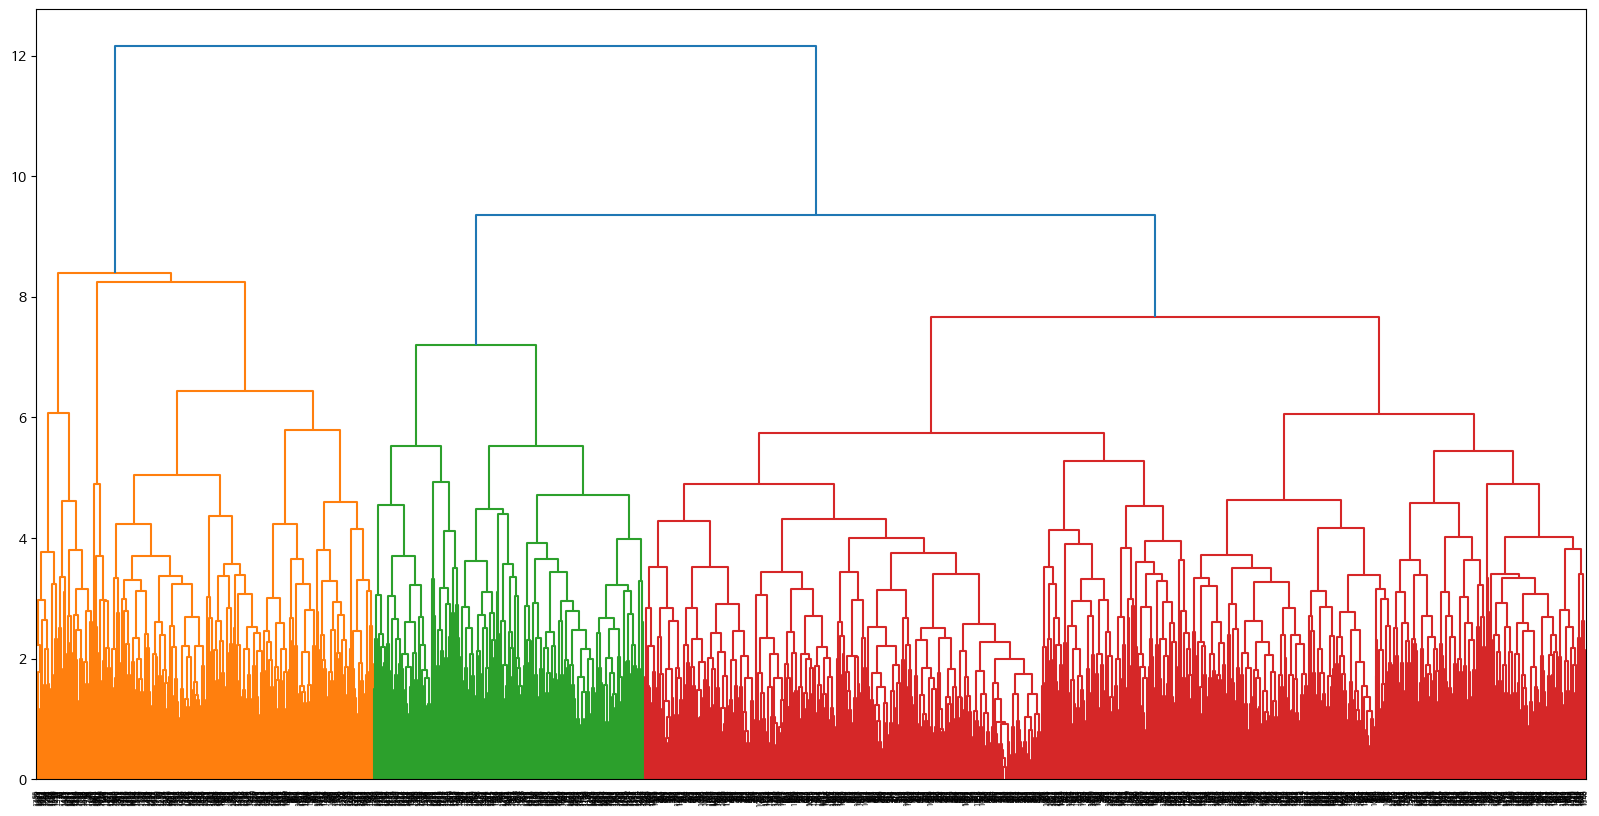

In [46]:
# 덴드로그램으로 확인
plt.figure(figsize=(20,10)) #이미지 크기 지정
dendrogram(m) #계층적 군집을 데드로 그램으로 그림
plt.show()

#중심 기반 군집 분석(K-Means cluster)
K-Means는 군집수를 사전에 정의해야 함 가장 쉽고, 속도가 빠른 알고리즘

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

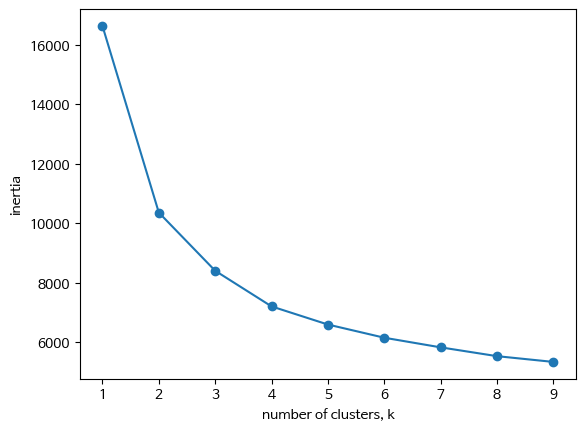

In [47]:
#K-Means() 군집
from sklearn.cluster import KMeans #KMeans 모듈 가져옴
#군집수를 정의하기 위한 차트
ks = range(1,10)

inertias = []



for k in ks:

    model = KMeans(n_clusters=k)

    model.fit(data)

    inertias.append(model.inertia_)


# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show()

In [48]:
# create model and prediction

model = KMeans(n_clusters=4,algorithm='auto') #군집수 지정(가장 중요함)

model.fit(data) #모델설정

predict = pd.DataFrame(model.predict(data)) #군집을 예측

predict.columns=['cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [55]:
data_result = pd.concat([df_data,predict],axis=1)
data_result1 = pd.concat([data,predict],axis=1)

In [56]:
data_result1.groupby('cluster').mean()

,Q5,Q8,Q9,Q10,Q11,Q12,Q13,Q14,age,gender,wage
cluster,,,,,,,,,,,
0,2.942710,2.670308,2.539332,2.820694,2.695373,2.906170,2.375964,2.444730,1.784062,1.452442,3.655527
1,2.574371,1.965675,1.663616,2.037757,1.496568,1.838673,1.183638,1.282609,1.853547,1.549199,4.874142
2,1.991572,1.724558,1.514159,1.641224,1.357670,1.828909,1.150442,1.182891,2.412979,1.526549,2.269912
3,3.018797,2.639803,2.394737,2.879112,2.595395,2.745066,2.159539,2.303454,1.457237,1.417763,7.157895


In [57]:
cols = ['age', 'gender', 'w']
for col in cols :
  print(col)
  print(pd.crosstab(data_result['cluster'], data_result[col], margins=True))
  print(pd.crosstab(data_result['cluster'], data_result[col], normalize='index')*100)
  print("=================================")



age
age      50대  60대  70대이상   All
cluster                       
0        134  205     50   389
1        136  229     72   437
2         50  298    330   678
3        176  117     11   304
All      496  849    463  1808
age            50대        60대      70대이상
cluster                                 
0        34.447301  52.699229  12.853470
1        31.121281  52.402746  16.475973
2         7.374631  43.952802  48.672566
3        57.894737  38.486842   3.618421
gender
gender    남자   여자   All
cluster                
0        213  176   389
1        197  240   437
2        321  357   678
3        177  127   304
All      908  900  1808
gender          남자         여자
cluster                      
0        54.755784  45.244216
1        45.080092  54.919908
2        47.345133  52.654867
3        58.223684  41.776316
w
w        100만원대  100만원미만  200만원대  300만원대  400-500만원대  600만원이상   All
cluster                                                            
0            48        0     112     155

#④ 그룹별 분석

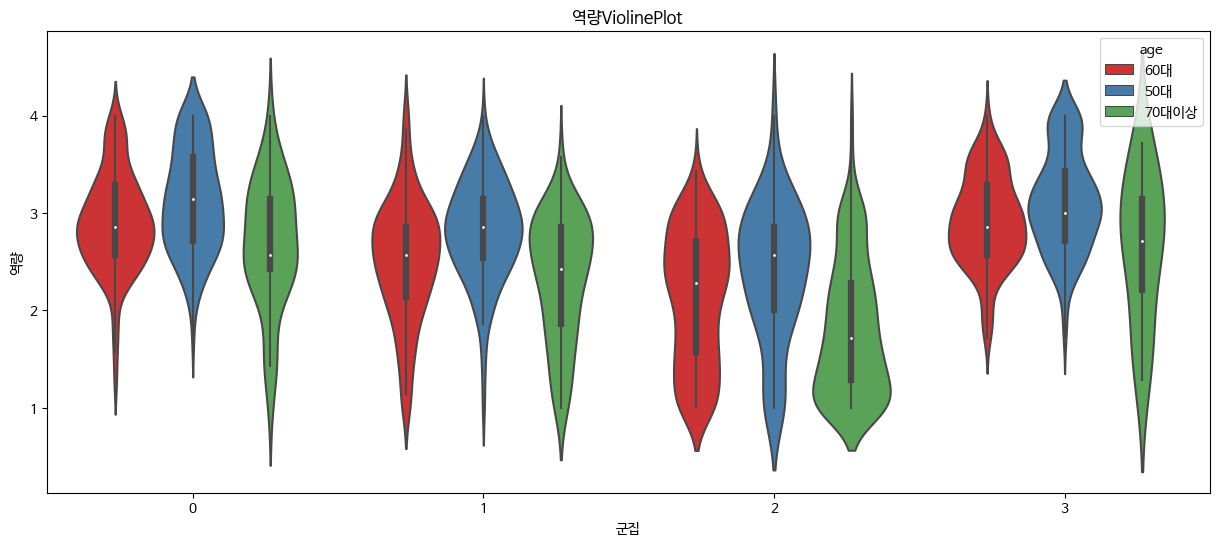

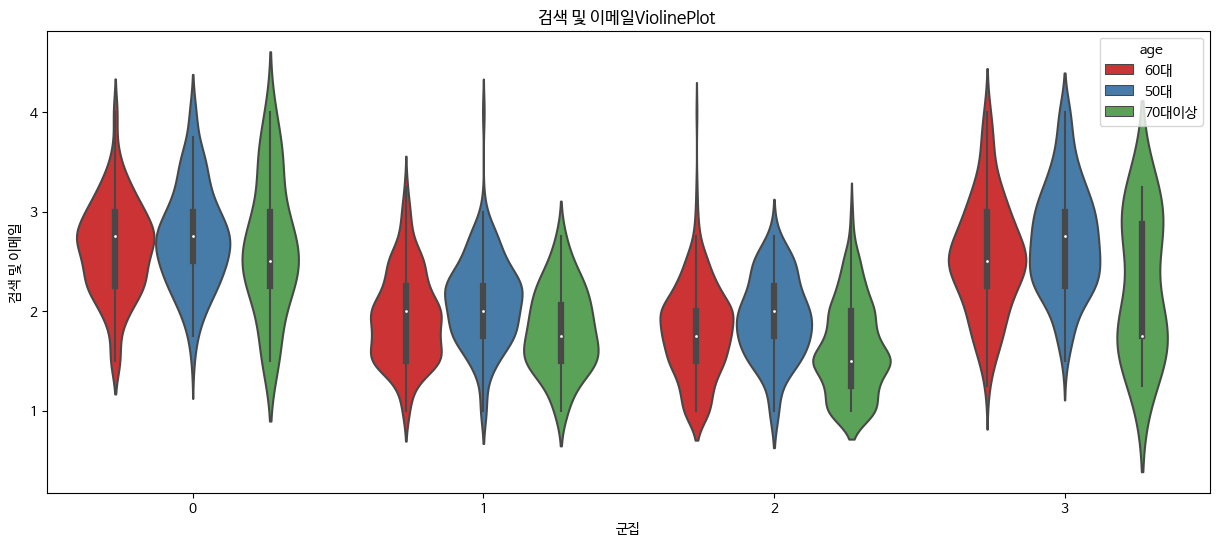

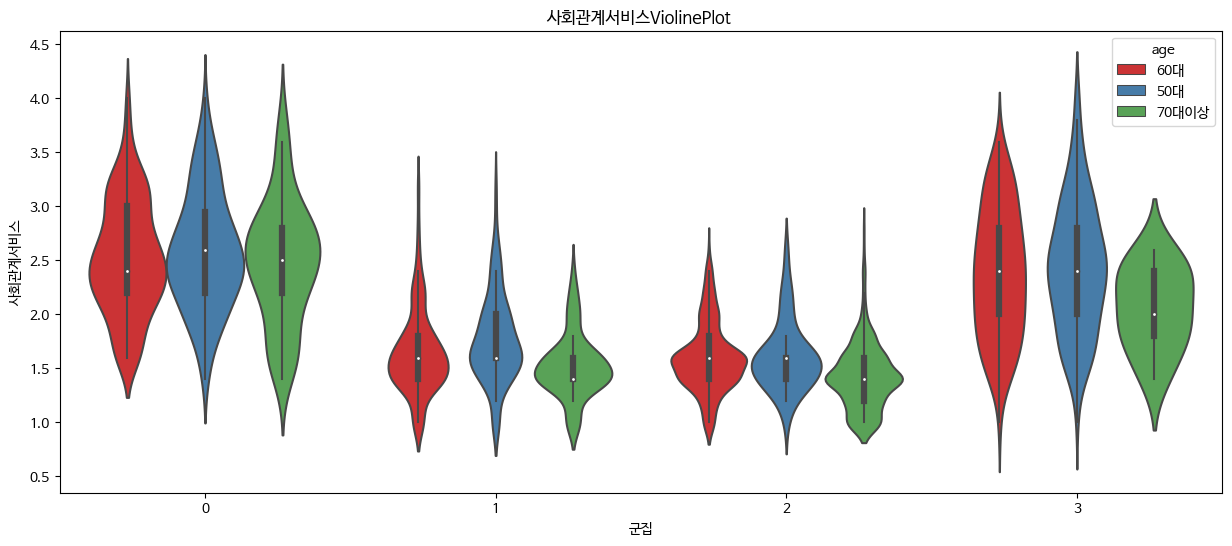

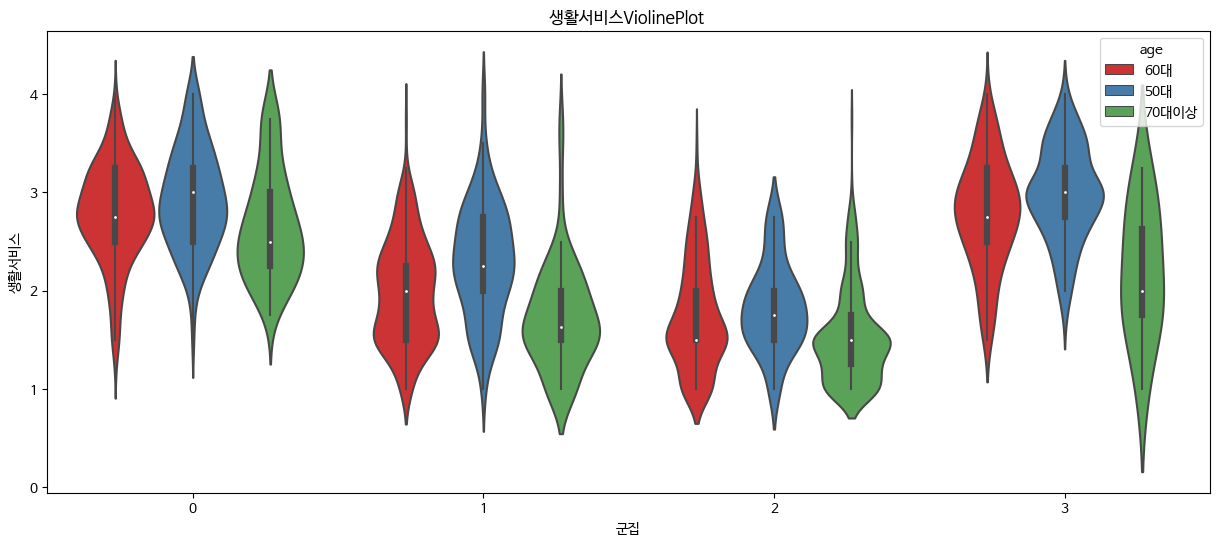

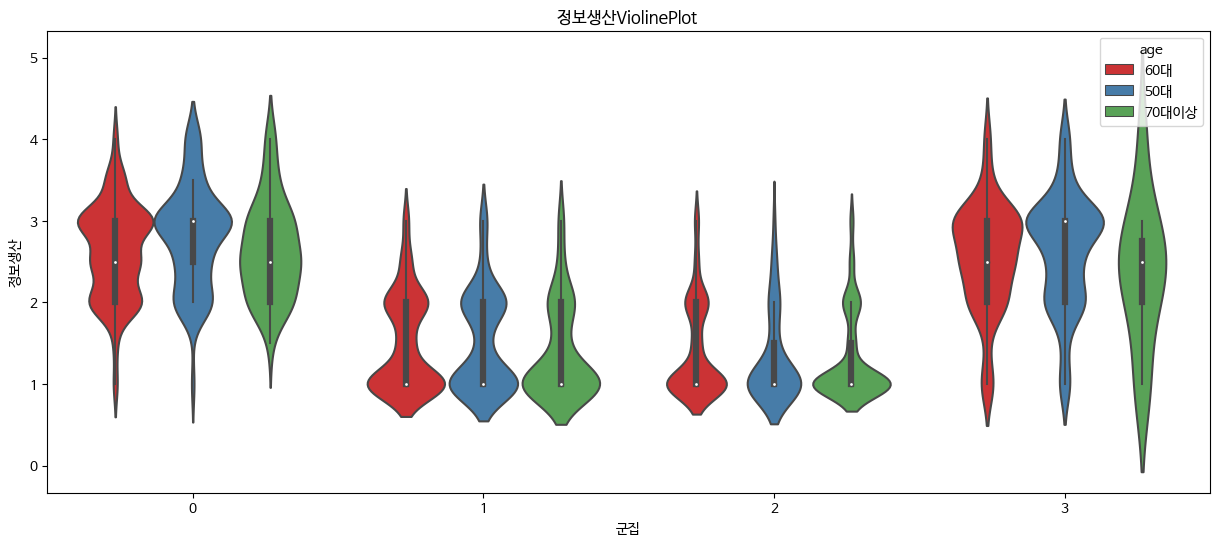

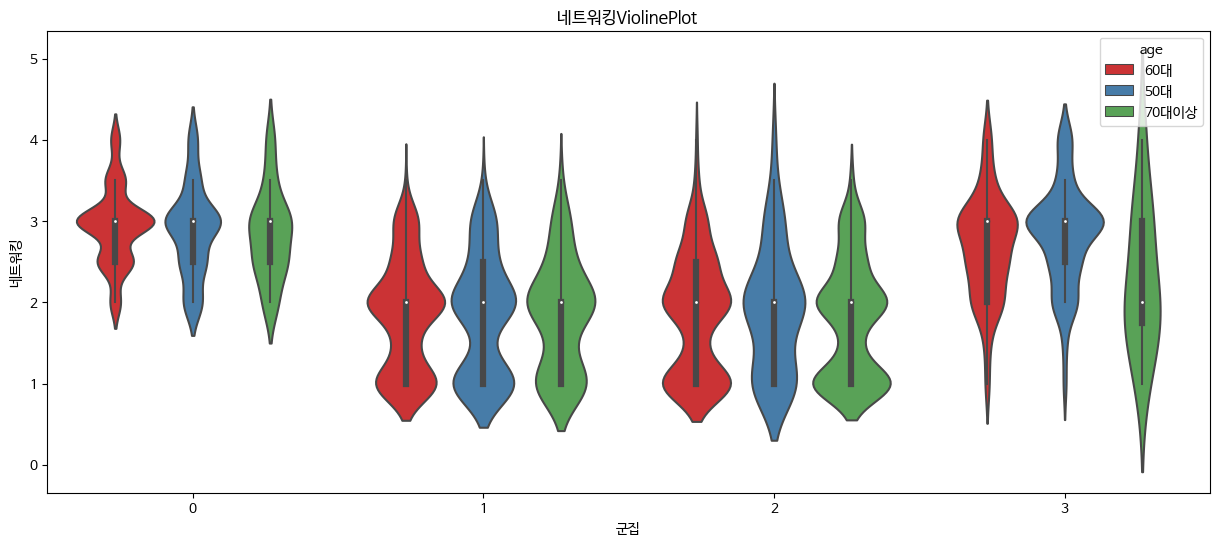

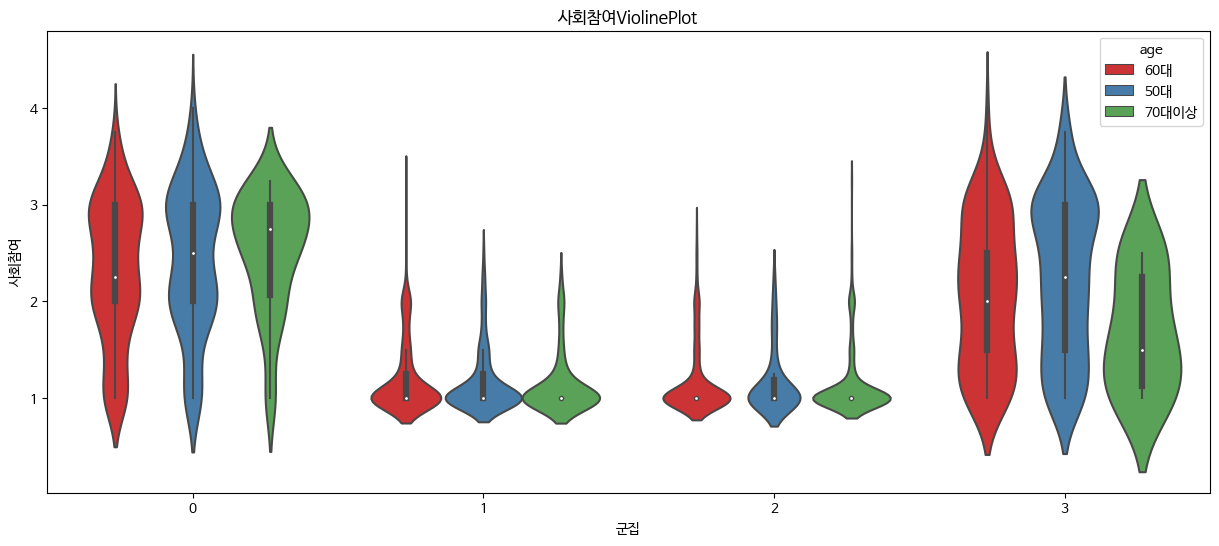

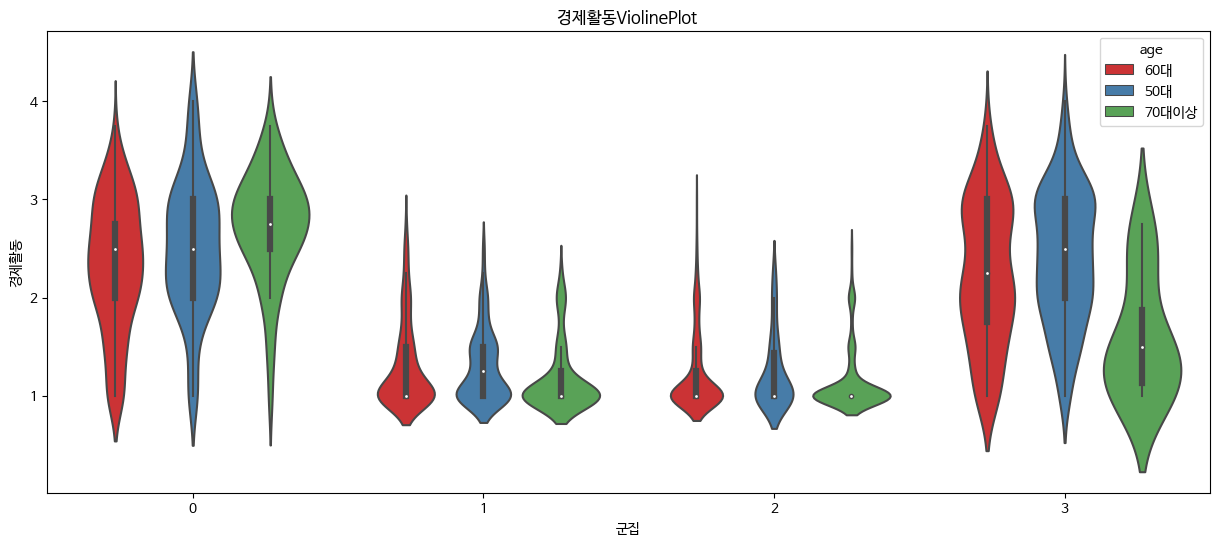

In [58]:
#연령과 소득별 디지털 역량지표 바이올린그래프로 확인
dic = {'역량': 'Q5', '검색 및 이메일' : 'Q8', '사회관계서비스': 'Q9', '생활서비스': 'Q10', '정보생산': 'Q11', '네트워킹':'Q12',  '사회참여': 'Q13', '경제활동': 'Q14'} #딕셔너리로 정의
for key, val in dic.items() : #한꺼번에 violinplot을 그리기 위해 for문사용
  plt.figure(figsize=(15, 6))
  sns.violinplot(x="cluster", y=val, hue="age", data=data_result, palette="Set1")
  plt.xlabel("군집")
  plt.ylabel(key)
  plt.title( key + 'ViolinePlot ')
  plt.show()